###  Import Libraries & Load Dataset

In this step, we import the required libraries and load our dataset (`eda_data.csv`) to begin our salary prediction project. We will also preview the first few rows of the dataset to understand its structure.


In [5]:
import pandas as pd

# Load the EDA dataset (correct path)
df = pd.read_csv("salary_app/eda_data.csv")

# Preview to confirm
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


###  Understanding the Dataset Structure & Select Features

Before modeling, we need to understand the dataset's structure, data types, and available features. This helps in choosing the most relevant columns for salary prediction. We'll check column names, data types, and identify any potential features.


In [6]:
# Check dataset shape
print("Dataset shape:", df.shape)

# View column names
print("Columns:\n", df.columns.tolist())

# Check data types and null values
df.info()

# Optionally, check for any missing values
df.isnull().sum()


Dataset shape: (742, 33)
Columns:
 ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7 

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

###  Summary Statistics

We begin EDA by checking descriptive statistics for the numerical columns to get a sense of the distribution of salaries, ratings, and other numeric features.


In [7]:
# Basic statistics for numeric columns
df.describe()


,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


###  Salary Distribution (min, max, avg)

We visualize the distributions of minimum, maximum, and average salaries to understand how salaries vary across jobs. This helps us identify any skewed data, outliers, and central trends.


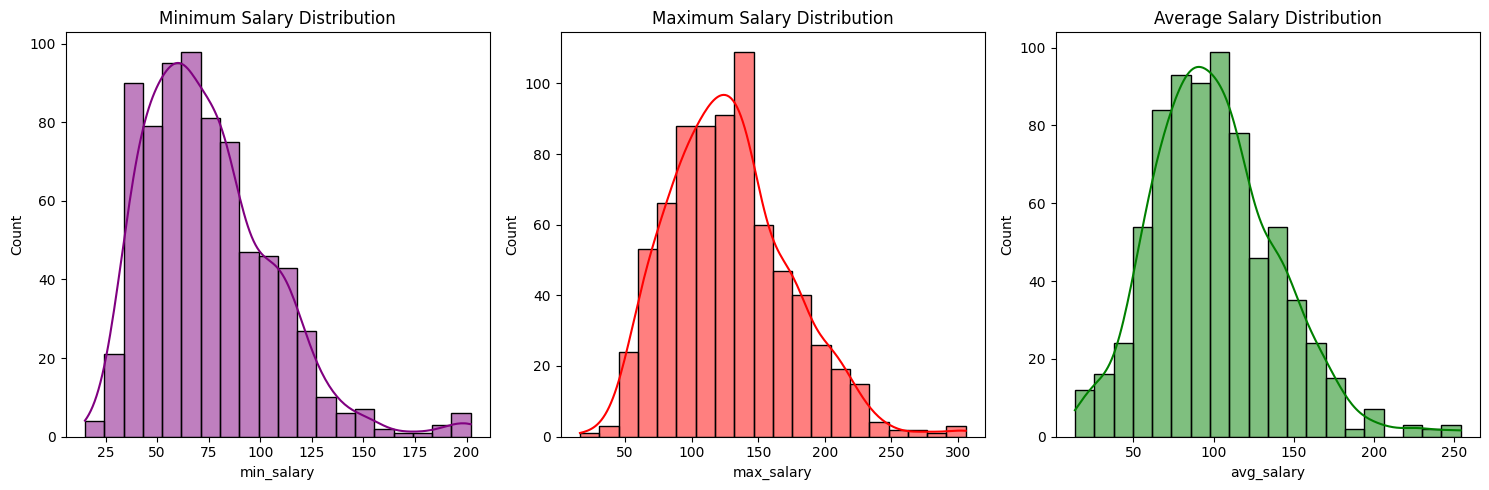

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with subplots
plt.figure(figsize=(15, 5))

# Min Salary
plt.subplot(1, 3, 1)
sns.histplot(df['min_salary'], bins=20, kde=True, color='purple')
plt.title('Minimum Salary Distribution')

# Max Salary
plt.subplot(1, 3, 2)
sns.histplot(df['max_salary'], bins=20, kde=True, color='red')
plt.title('Maximum Salary Distribution')

# Average Salary
plt.subplot(1, 3, 3)
sns.histplot(df['avg_salary'], bins=20, kde=True, color='green')
plt.title('Average Salary Distribution')

plt.tight_layout()
plt.show()


###  Skill vs Average Salary

This step helps us understand how each technical skill (Python, R, Spark, AWS, Excel) influences average salary. We'll use boxplots to compare salaries between people with and without each skill.


C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\407611006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\407611006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\407611006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\407611006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

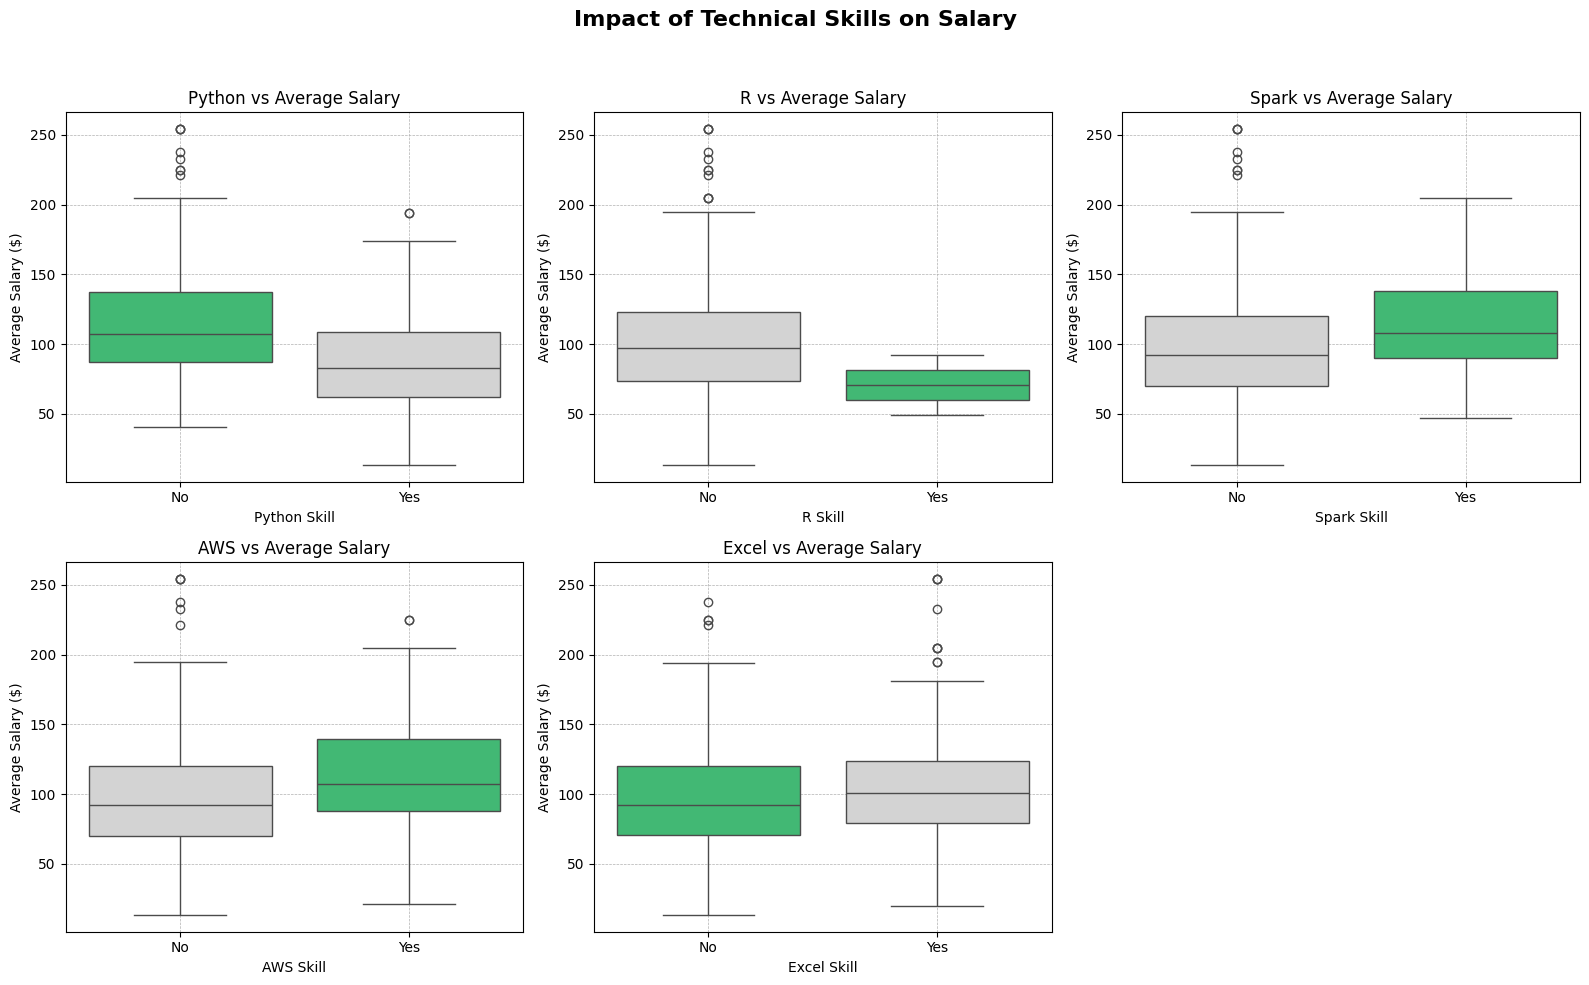

In [9]:
plt.figure(figsize=(16, 10))
skill_labels = {
    'python_yn': 'Python',
    'R_yn': 'R',
    'spark': 'Spark',
    'aws': 'AWS',
    'excel': 'Excel'
}

for i, skill in enumerate(skill_labels):
    plt.subplot(2, 3, i+1)
    sns.boxplot(
        x=df[skill].astype(str),  # make sure it's string for palette matching
        y=df['avg_salary'], 
        palette={'0': 'lightgray', '1': '#2ecc71'}
    )
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.title(f'{skill_labels[skill]} vs Average Salary', fontsize=12)
    plt.xlabel(f'{skill_labels[skill]} Skill')
    plt.ylabel('Average Salary ($)')
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle('Impact of Technical Skills on Salary', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###  Job Title & State vs Average Salary

These bar plots help us identify:
- Which job roles have higher average salaries
- How salaries vary based on the state

This is useful for deciding which fields to include in user input for prediction later.


C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\3236993524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_r')
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\3236993524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_salary.values, y=state_salary.index, palette='Greens_r')


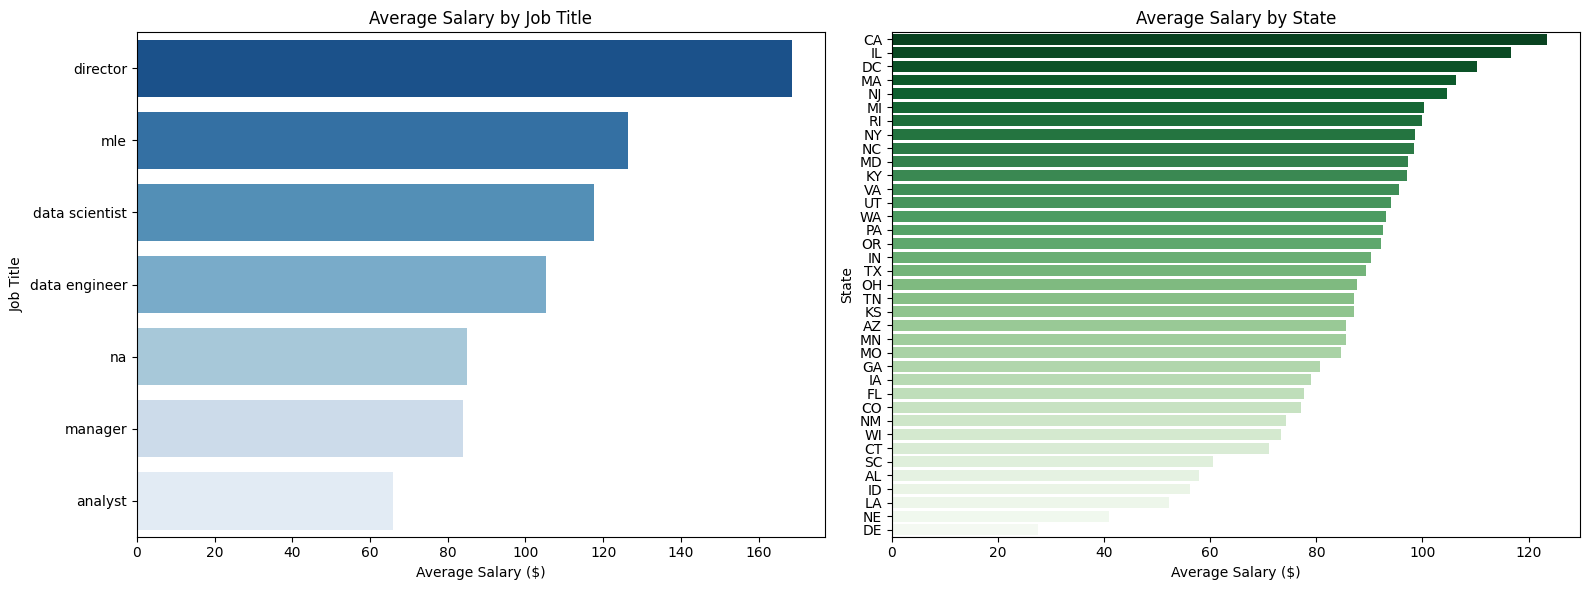

In [10]:
plt.figure(figsize=(16, 6))

# Avg Salary by Job Title
plt.subplot(1, 2, 1)
job_salary = df.groupby('job_simp')['avg_salary'].mean().sort_values(ascending=False)
sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_r')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')

# Avg Salary by State
plt.subplot(1, 2, 2)
state_salary = df.groupby('job_state')['avg_salary'].mean().sort_values(ascending=False)
sns.barplot(x=state_salary.values, y=state_salary.index, palette='Greens_r')
plt.title('Average Salary by State')
plt.xlabel('Average Salary ($)')
plt.ylabel('State')

plt.tight_layout()
plt.show()


###  Correlation Heatmap

The correlation heatmap shows how numerical features (like skills) relate to average salary. A value closer to +1 or -1 means a stronger linear relationship, while 0 means no correlation.

This helps us understand which features impact salary the most.


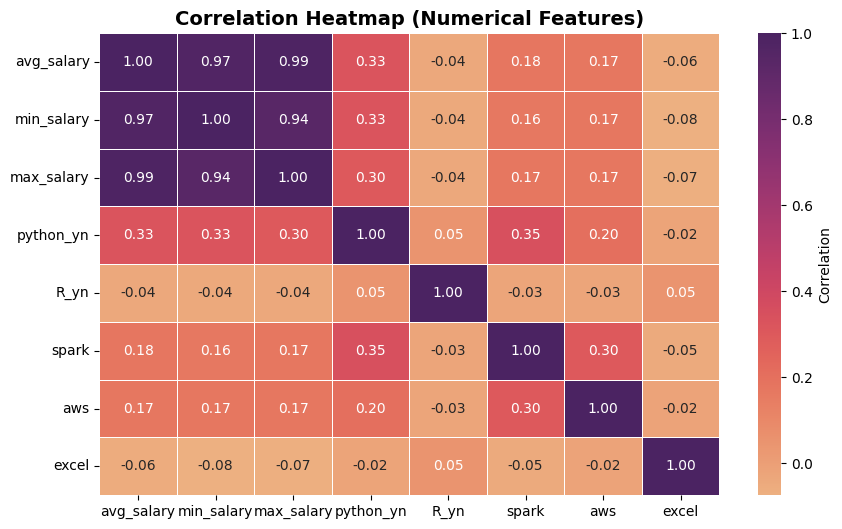

In [11]:
# Select only numerical columns for correlation
numerical_cols = ['avg_salary', 'min_salary', 'max_salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

# Compute correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='flare', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Numerical Features)', fontsize=14, fontweight='bold')
plt.show()



###  Data Cleaning - Missing Values & Duplicates

To ensure accurate modeling, we check for:
- Missing (null) values in important columns
- Duplicate rows that can bias the model
- Any irrelevant columns to drop


In [12]:
# Check for missing values
print("Missing values:\n")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Optionally: View duplicate rows
# df[df.duplicated()]


Missing values:

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

Number of duplicate rows: 0


###  Final Feature Selection

We are now selecting the relevant columns for our model.

**Input Features:**
- Job role: `job_simp`
- Location: `job_state`
- Seniority level: `seniority`
- Skills: `python_yn`, `R_yn`, `spark`, `aws`, `excel`
- Company-related: `Rating`, `desc_len`, `num_comp`

**Target Variable:**
- `avg_salary` (to be predicted)


In [13]:
# Define list of feature columns
features = [
    'job_simp',       # Simplified job title
    'job_state',      # State where job is located
    'seniority',      # Junior/Senior/etc.
    'python_yn',      # Python skill (1 or 0)
    'R_yn',           # R skill
    'spark',          # Spark skill
    'aws',            # AWS skill
    'excel',          # Excel skill
    'Rating',         # Company rating
    'desc_len',       # Length of job description
    'num_comp'        # Number of competitors listed
]

# Define target column
target = 'avg_salary'

# Assign features and target to variables
X = df[features]
y = df[target]

# Check the shapes to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (742, 11)
Target shape: (742,)


###  Encode Categorical Features

Machine learning models require input features to be numeric. So we use one-hot encoding to convert categorical columns like `job_simp`, `job_state`, and `seniority` into binary vectors (0s and 1s).


In [14]:
# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=['job_simp', 'job_state', 'seniority'], drop_first=True)

# Check shape after encoding
print("Shape after encoding:", X_encoded.shape)

# Optional: Preview encoded features
X_encoded.head()


Shape after encoding: (742, 52)


,python_yn,R_yn,spark,aws,excel,Rating,desc_len,num_comp,job_simp_data engineer,job_simp_data scientist,...,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WI,seniority_na,seniority_senior
0,1,0,0,0,1,3.8,2536,0,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0,3.4,4783,0,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1,0,1,0,1,4.8,3461,0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,0,0,0,0,3.8,3883,3,False,True,...,False,False,False,False,False,False,True,False,True,False
4,1,0,0,0,1,2.9,2728,3,False,True,...,False,False,False,False,False,False,False,False,True,False


###  Train-Test Split

We split the data into training and testing sets to evaluate model performance:
- 80% data for training
- 20% data for testing


In [15]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Show shape to confirm
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (593, 52)
Test set shape: (149, 52)


###  Linear Regression Model (Baseline)

We start by training a simple Linear Regression model to predict average salary. This will serve as a baseline for comparing with more advanced models.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Linear Regression Performance:
MAE  : 20.00
RMSE : 26.11
R²   : 0.5831


###  Training Other Models (Ridge, Lasso, Random Forest)

To improve prediction accuracy, we train multiple models and compare their performance against the baseline Linear Regression.


In [17]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Initialize models
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor(random_state=42)

# Train models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE : {mean_squared_error(y_true, y_pred)**0.5:.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")

evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Random Forest", y_test, y_pred_rf)



Ridge Regression Performance:
MAE  : 20.07
RMSE : 26.42
R²   : 0.5728

Lasso Regression Performance:
MAE  : 24.72
RMSE : 32.65
R²   : 0.3480

Random Forest Performance:
MAE  : 12.87
RMSE : 21.23
R²   : 0.7241


###   Gradient Boosting and XGBoost Models

We now train GradientBoostingRegressor and XGBRegressor to compare them with previous models.


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize models
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)

# Train models
gbr.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Evaluate function from earlier
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE : {mean_squared_error(y_true, y_pred)**0.5:.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")

# Evaluate both
evaluate_model("Gradient Boosting", y_test, y_pred_gbr)
evaluate_model("XGBoost", y_test, y_pred_xgb)



Gradient Boosting Performance:
MAE  : 17.57
RMSE : 23.77
R²   : 0.6543

XGBoost Performance:
MAE  : 10.67
RMSE : 22.07
R²   : 0.7021


###  Visual Comparison of Model Performance

We now plot the R² scores of all models to justify our choice of the best model (Random Forest). The model with the highest R² score explains the most variance in salary predictions.


C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\400207786.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_scores, y=model_names, palette="viridis")


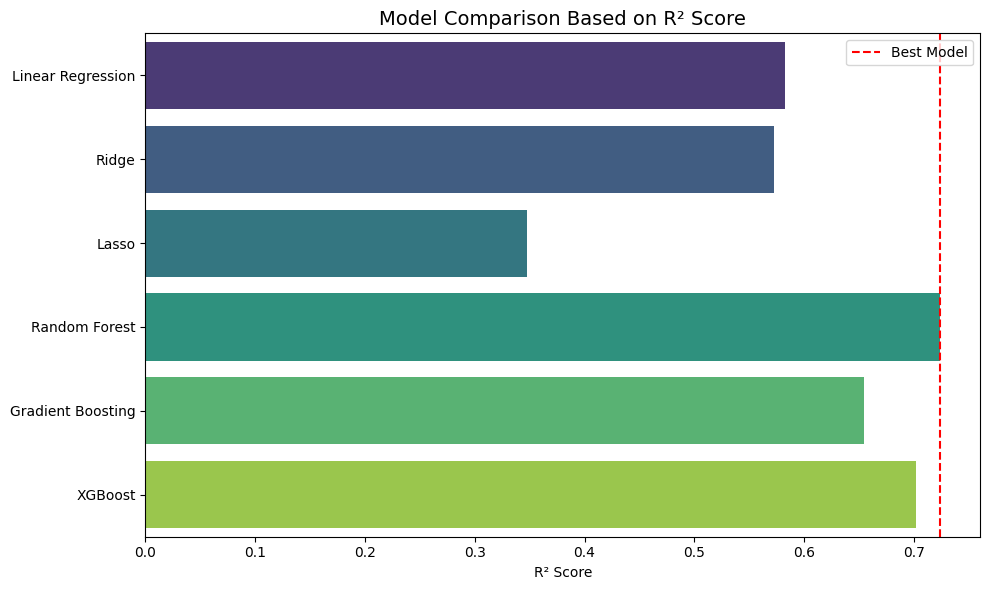

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and R² scores
model_names = [
    "Linear Regression", 
    "Ridge", 
    "Lasso", 
    "Random Forest", 
    "Gradient Boosting", 
    "XGBoost"
]

r2_scores = [
    0.5831,  # Linear
    0.5728,  # Ridge
    0.3480,  # Lasso
    0.7241,  # RF (best)
    0.6543,  # GBR
    0.7021   # XGB
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names, palette="viridis")
plt.xlabel("R² Score")
plt.title("Model Comparison Based on R² Score", fontsize=14)
plt.axvline(max(r2_scores), color='red', linestyle='--', label="Best Model")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\3825807819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mae_scores, y=model_names, palette="magma")


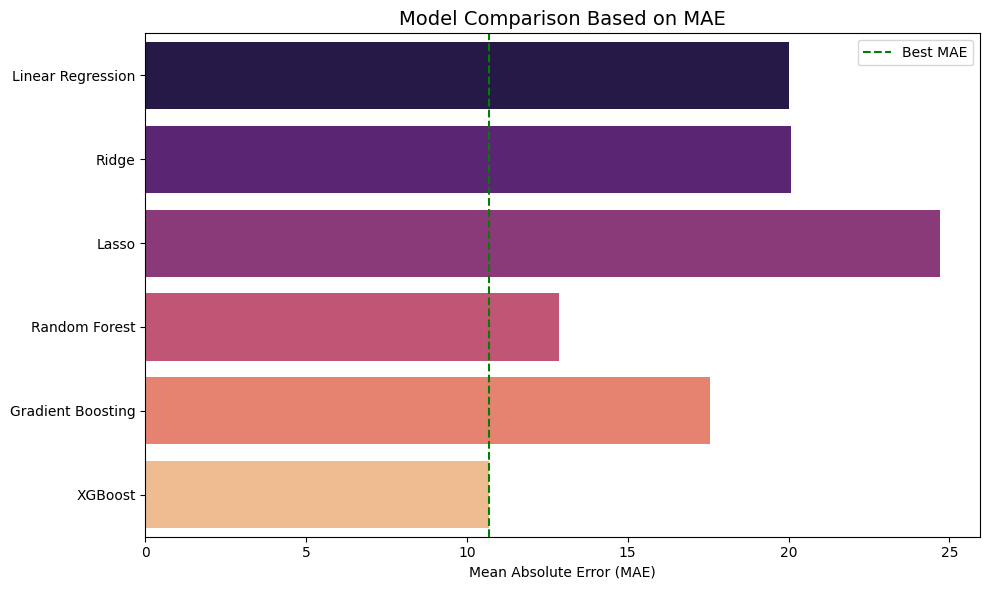

In [20]:
mae_scores = [20.00, 20.07, 24.72, 12.87, 17.57, 10.67]

plt.figure(figsize=(10, 6))
sns.barplot(x=mae_scores, y=model_names, palette="magma")
plt.xlabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison Based on MAE", fontsize=14)
plt.axvline(min(mae_scores), color='green', linestyle='--', label="Best MAE")
plt.legend()
plt.tight_layout()
plt.show()


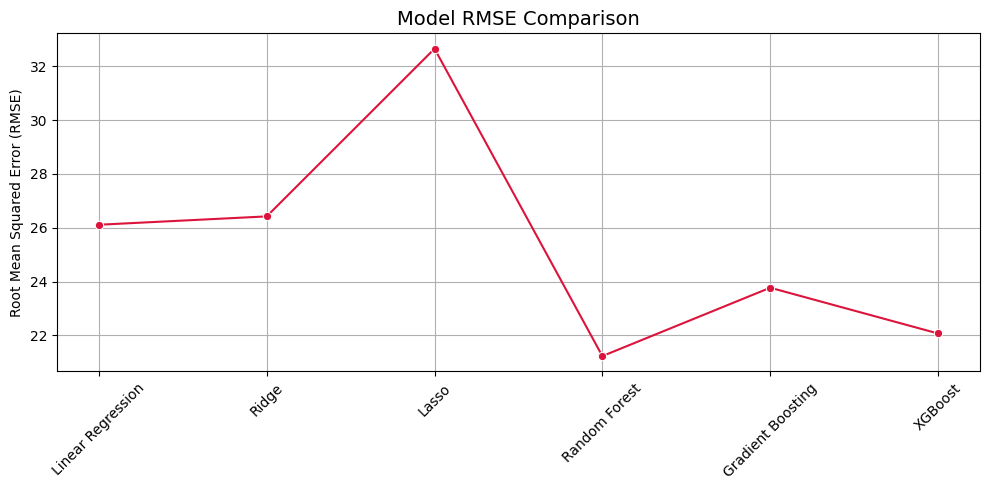

In [21]:
rmse_scores = [26.11, 26.42, 32.65, 21.23, 23.77, 22.07]

plt.figure(figsize=(10, 5))
sns.lineplot(x=model_names, y=rmse_scores, marker='o', color="crimson")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model RMSE Comparison", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


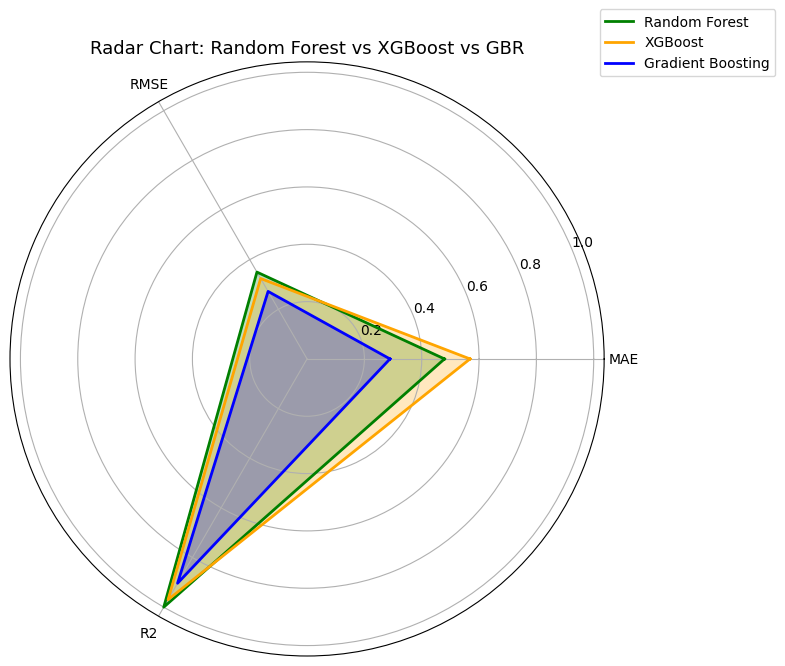

In [22]:
import numpy as np

# Normalize all scores to 0-1 for fair visual comparison
mae_norm = [1 - x / max(mae_scores) for x in mae_scores]
rmse_norm = [1 - x / max(rmse_scores) for x in rmse_scores]
r2_norm = [x / max(r2_scores) for x in r2_scores]

labels = ['MAE', 'RMSE', 'R2']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Repeat first angle to close the circle

# Function to plot one model
def plot_radar(model_name, values, color):
    values += values[:1]
    ax.plot(angles, values, label=model_name, linewidth=2, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

# Plot setup
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels)

# Plot each model
plot_radar("Random Forest", [mae_norm[3], rmse_norm[3], r2_norm[3]], 'green')
plot_radar("XGBoost", [mae_norm[5], rmse_norm[5], r2_norm[5]], 'orange')
plot_radar("Gradient Boosting", [mae_norm[4], rmse_norm[4], r2_norm[4]], 'blue')

plt.title("Radar Chart: Random Forest vs XGBoost vs GBR", size=13)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


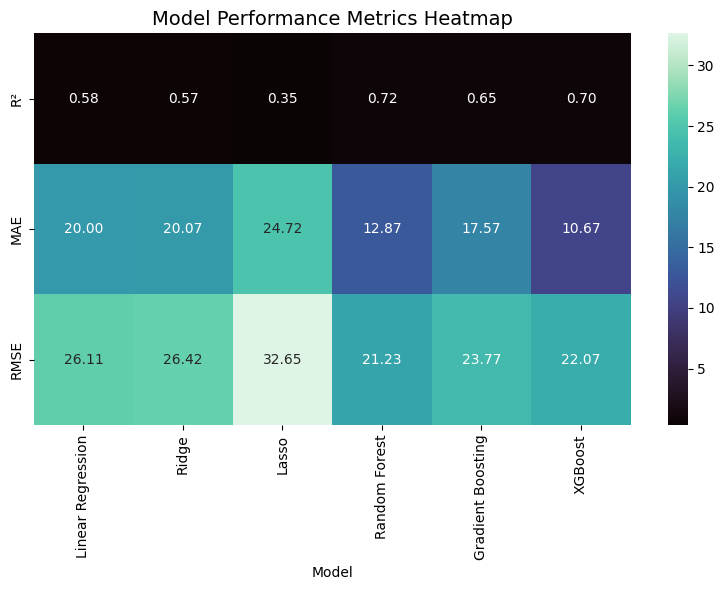

In [23]:
import pandas as pd

data = pd.DataFrame({
    'Model': model_names,
    'R²': r2_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

plt.figure(figsize=(8, 6))
sns.heatmap(data.set_index("Model").T, annot=True, cmap="mako", fmt=".2f")
plt.title("Model Performance Metrics Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


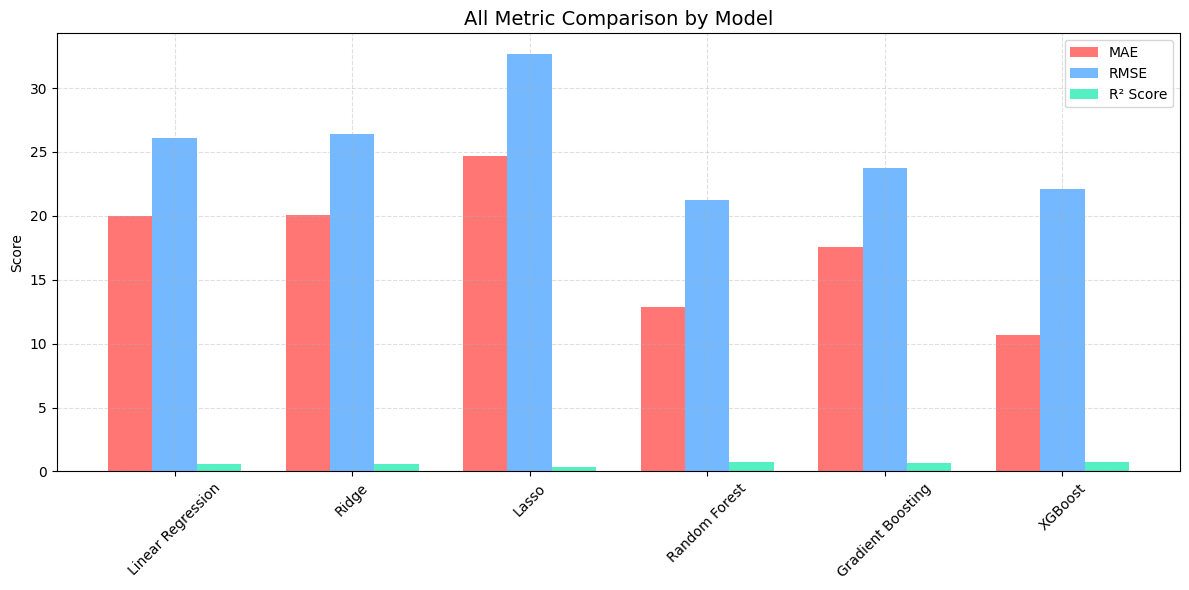

In [24]:
import numpy as np

x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, mae_scores, width=width, label='MAE', color='#ff7675')
plt.bar(x, rmse_scores, width=width, label='RMSE', color='#74b9ff')
plt.bar(x + width, r2_scores, width=width, label='R² Score', color='#55efc4')

plt.xticks(x, model_names, rotation=45)
plt.ylabel("Score")
plt.title("All Metric Comparison by Model", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


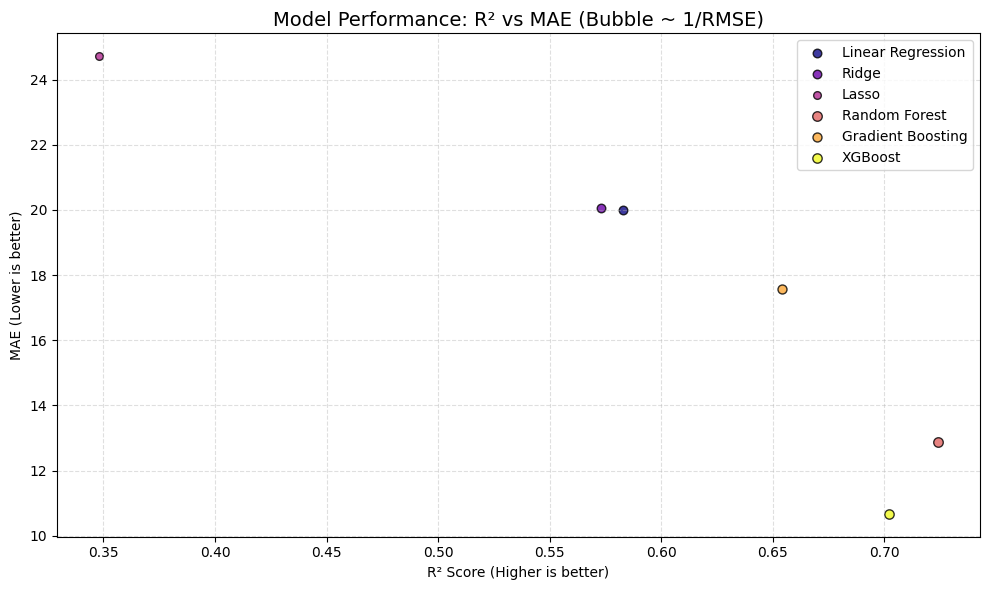

In [25]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
colors = cm.plasma(np.linspace(0, 1, len(model_names)))

for i, model in enumerate(model_names):
    plt.scatter(
        r2_scores[i],
        mae_scores[i],
        s=(1 / rmse_scores[i]) * 1000,
        label=model,
        alpha=0.8,
        color=colors[i],
        edgecolors='black'
    )

plt.xlabel("R² Score (Higher is better)")
plt.ylabel("MAE (Lower is better)")
plt.title("Model Performance: R² vs MAE (Bubble ~ 1/RMSE)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\2549780811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=score_df, x=metric, y='Model', jitter=True, size=12, palette="Set2")
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\2549780811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=score_df, x=metric, y='Model', jitter=True, size=12, palette="Set2")
C:\Users\sneha sucharitha\AppData\Local\Temp\ipykernel_1460\2549780811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=score_df, x=metr

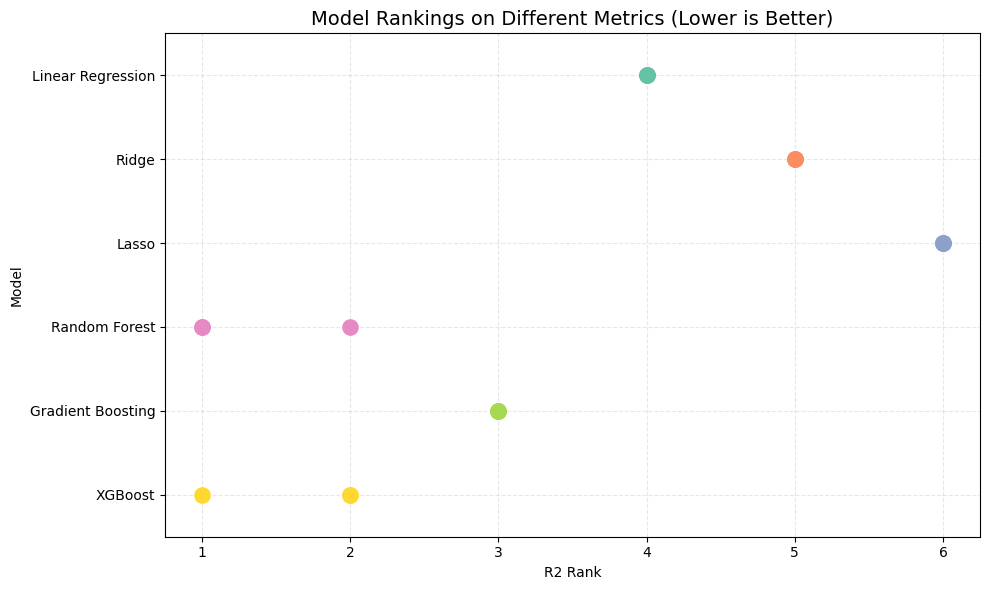

In [26]:
score_df = pd.DataFrame({
    'Model': model_names,
    'R2 Rank': pd.Series(r2_scores).rank(ascending=False),
    'MAE Rank': pd.Series(mae_scores).rank(),
    'RMSE Rank': pd.Series(rmse_scores).rank()
})

plt.figure(figsize=(10, 6))
for metric in ['R2 Rank', 'MAE Rank', 'RMSE Rank']:
    sns.stripplot(data=score_df, x=metric, y='Model', jitter=True, size=12, palette="Set2")

plt.title("Model Rankings on Different Metrics (Lower is Better)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


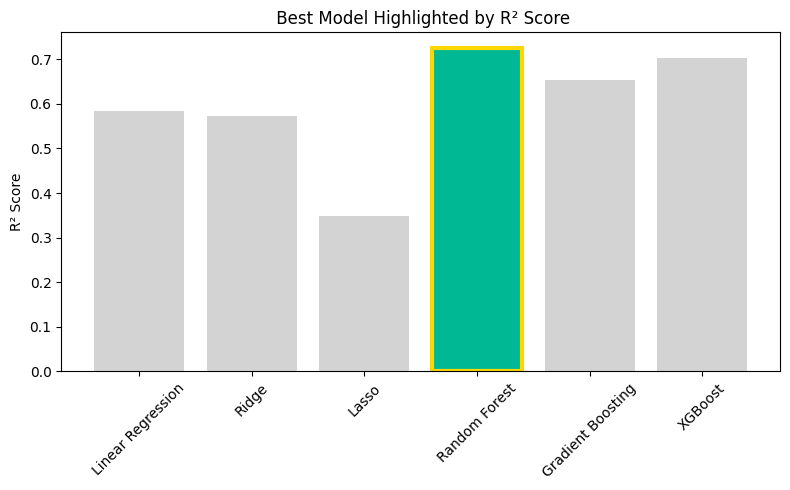

In [27]:
best_idx = np.argmax(r2_scores)

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color='lightgray')

# Highlight best model
bars[best_idx].set_color('#00b894')  # Green
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title(" Best Model Highlighted by R² Score")
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from IPython.display import display, HTML

# Create DataFrame
score_table = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_scores,
    'RMSE': rmse_scores,
    'R² Score': r2_scores
})

# Highlight the best model row
# Fixed version: works row by row
def highlight_best(row):
    return ['background-color: #00b894; color: white; font-weight: bold' if row['Model'] == 'Random Forest' else '' for _ in row]


styled_table = score_table.style.apply(highlight_best, axis=1)\
                                .set_caption(" Final Comparison of All Models")\
                                .format({"MAE": "{:.2f}", "RMSE": "{:.2f}", "R² Score": "{:.4f}"})\
                                .set_table_styles([{
                                    'selector': 'caption',
                                    'props': [('color', 'black'),
                                              ('font-size', '16px'),
                                              ('font-weight', 'bold'),
                                              ('text-align', 'left')]
                                }])

display(styled_table)


,Model,MAE,RMSE,R² Score
0,Linear Regression,20.00,26.11,0.5831
1,Ridge,20.07,26.42,0.5728
2,Lasso,24.72,32.65,0.3480
3,Random Forest,12.87,21.23,0.7241
4,Gradient Boosting,17.57,23.77,0.6543
5,XGBoost,10.67,22.07,0.7021


###  Save the Final Model (Random Forest)

We'll save our trained Random Forest model using `joblib` so it can be used in the Flask app for real-time salary prediction.


In [29]:
import joblib

# Save the model
joblib.dump(rf, 'salary_prediction_model.pkl')

# Save the column names used for prediction
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print(" Model and feature list saved successfully.")


 Model and feature list saved successfully.


In [33]:
print(df.columns.tolist())


['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']


In [34]:
# Set target
y = df['avg_salary']

# Drop target from features
X = df.drop('avg_salary', axis=1)

# Select only numeric + useful categorical columns
X = X[['Job Title', 'job_state', 'Rating', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp']] if 'desc_len' in df.columns and 'num_comp' in df.columns else \
    X[['Job Title', 'job_state', 'Rating', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']]

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=['Job Title', 'job_state'], drop_first=True)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf.predict(X_test)

print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MAE     :", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE    :", round(mean_squared_error(y_test, y_pred) ** 0.5, 2))

# Save model and features
import joblib
joblib.dump(rf, "salary_prediction_model_v2.pkl")
joblib.dump(list(X_encoded.columns), "model_features_v2.pkl")

print("✅ Model retrained and saved successfully!")


R² Score: 0.6625
MAE     : 15.27
RMSE    : 23.49
✅ Model retrained and saved successfully!


In [36]:
import joblib

# Load the trained features list
features = joblib.load("salary_app/model_features_v2.pkl")

# Print all features
for i, feat in enumerate(features, 1):
    print(f"{i}. {feat}")


1. Rating
2. age
3. python_yn
4. R_yn
5. spark
6. aws
7. excel
8. Job Title_Analytics - Business Assurance Data Analyst
9. Job Title_Analytics Consultant
10. Job Title_Analytics Manager
11. Job Title_Analytics Manager - Data Mart
12. Job Title_Assistant Director/Director, Office of Data Science
13. Job Title_Associate Data Analyst
14. Job Title_Associate Data Analyst- Graduate Development Program
15. Job Title_Associate Data Engineer
16. Job Title_Associate Data Scientist/Computer Scientist
17. Job Title_Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence
18. Job Title_Associate Director/Director, Safety Scientist
19. Job Title_Associate Environmental Scientist - Wildlife Biologist
20. Job Title_Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad
21. Job Title_Associate Principal Scientist, Pharmacogenomics
22. Job Title_Associate Research Scientist I (Protein Expression and Production)
23. Job Title_Associate Scientist
24. Job Titl

In [39]:
import joblib
features = joblib.load("salary_app/model_features_v2.pkl")
print(features)


['Rating', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Job Title_Analytics - Business Assurance Data Analyst', 'Job Title_Analytics Consultant', 'Job Title_Analytics Manager', 'Job Title_Analytics Manager - Data Mart', 'Job Title_Assistant Director/Director, Office of Data Science', 'Job Title_Associate Data Analyst', 'Job Title_Associate Data Analyst- Graduate Development Program', 'Job Title_Associate Data Engineer', 'Job Title_Associate Data Scientist/Computer Scientist', 'Job Title_Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence', 'Job Title_Associate Director/Director, Safety Scientist', 'Job Title_Associate Environmental Scientist - Wildlife Biologist', 'Job Title_Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad', 'Job Title_Associate Principal Scientist, Pharmacogenomics', 'Job Title_Associate Research Scientist I (Protein Expression and Production)', 'Job Title_Associate Scientist', 'Job Title_Associate Scie